In [16]:
#import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.version
from torchvision import datasets, transforms


In [17]:
#tell how to transform the data 
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

#load the dataset

train_dataset= datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset=datasets.MNIST(root='./data', train=False, download=True, transform=transform)

#load the data into dataloader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [18]:
#define cnn model

class CNN(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1= nn.Conv2d(1,32,kernel_size=3)
        self.conv2=nn.Conv2d(32,64,kernel_size=3)
        self.conv3=nn.Conv2d(64,128,kernel_size=3)
        self.pool=nn.MaxPool2d(2,2)
        self.dropout=nn.Dropout(0.25)
        self.fc1 = nn.Linear(128 * 10 * 10, 256)
        self.fc2 = nn.Linear(256,10)
    
    def forward(self, x):
        x=torch.relu(self.conv1(x))
        x=torch.relu(self.conv2(x))
        x=self.pool(x)
        x=torch.relu(self.conv3(x))
        x=self.dropout(x)
        x=x.view(-1, 128 * 10 * 10)
        # x = x.view(x.size(0), -1)
        x=torch.relu(self.fc1(x))
        x=self.fc2(x)
        return x


In [19]:
#initialize model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(0)

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(torch.cuda.is_available())
# print(torch.__version__)

True


In [20]:
#train the model
epochs=5
losses = []

for epoch in range(epochs):
    model.train()
    total_loss=0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs=model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss+=loss.item()
    losses.append(total_loss)
    print(f"Epoch {epoch+1} Loss: {total_loss/len(train_loader)}")



Epoch 1 Loss: 0.10941191103536763
Epoch 2 Loss: 0.03609510658976638
Epoch 3 Loss: 0.024749438179662946
Epoch 4 Loss: 0.018061095526173496
Epoch 5 Loss: 0.01461133171047891


Text(0, 0.5, 'Loss')

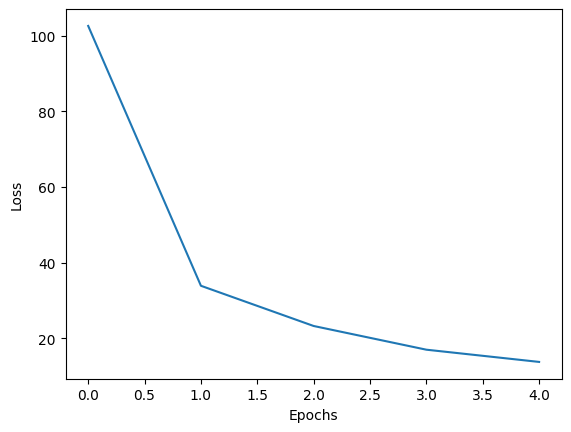

In [21]:
#graph
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [22]:
#evaluate model
model.eval()
correct=0
total=0
with torch.no_grad():
    for images,labels in test_loader:
        images,labels= images.to(device), labels.to(device)
        outputs=model(images)
        _,preds= torch.max(outputs,1)
        correct+= (preds==labels).sum().item()
        total+=labels.size(0)

    print(f"Accuracy: {(100*correct)/total}%")




Accuracy: 99.3%
